In [197]:
# Data Handling
#===================
import pandas as pd

# Data Handling
#===================
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
#===================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

In [198]:
transactions_original = pd.read_csv('transactions_lists.csv')
modified_txn_05 = pd.read_csv('modified_txn_final_05.csv')
modified_txn_045 = pd.read_csv('modified_txn_final_045.csv')
modified_txn_04 = pd.read_csv('modified_txn_final_04.csv')

In [199]:
rules_to_hide_05 = pd.read_csv('rules_to_hide_df_05.csv')
rules_to_hide_045 = pd.read_csv('rules_to_hide_df_045.csv')
rules_to_hide_04 = pd.read_csv('rules_to_hide_df_04.csv')

In [200]:
# # make the ruls to hide with antecedents and consequents drop remaining columns
# rules_to_hide_05 = rules_to_hide_05[['antecedents', 'consequents']]
# # rules_to_hide_05
# # 0	frozenset({'1358'})	frozenset({'1359'}) , the frozenset is string, we need to remove that
# # change this format to just 1358, 1359 frozensets

# rules_to_hide_05['antecedents'] = rules_to_hide_05['antecedents'].apply(lambda x: x.replace('frozenset({', '').replace('})', ''))
# rules_to_hide_05['consequents'] = rules_to_hide_05['consequents'].apply(lambda x: x.replace('frozenset({', '').replace('})', ''))

# # "'1358'" from this to 1358
# rules_to_hide_05['antecedents'] = rules_to_hide_05['antecedents'].apply(lambda x: x.replace("'", ''))
# rules_to_hide_05['consequents'] = rules_to_hide_05['consequents'].apply(lambda x: x.replace("'", ''))

# # rules_to_hide_05
# # make into frozensets
# rules_to_hide_05['antecedents'] = rules_to_hide_05['antecedents'].apply(lambda x: frozenset(x.split(', ')))
# rules_to_hide_05['consequents'] = rules_to_hide_05['consequents'].apply(lambda x: frozenset(x.split(', ')))

# rules_to_hide_05



In [201]:
def formating_rules_to_hide_dfs(df):
    # make the ruls to hide with antecedents and consequents drop remaining columns
    df = df[['antecedents', 'consequents']]
    # rules_to_hide_05
    # 0	frozenset({'1358'})	frozenset({'1359'}) , the frozenset is string, we need to remove that
    # change this format to just 1358, 1359 frozensets

    df['antecedents'] = df['antecedents'].apply(lambda x: x.replace('frozenset({', '').replace('})', ''))
    df['consequents'] = df['consequents'].apply(lambda x: x.replace('frozenset({', '').replace('})', ''))

    # "'1358'" from this to 1358
    df['antecedents'] = df['antecedents'].apply(lambda x: x.replace("'", ''))
    df['consequents'] = df['consequents'].apply(lambda x: x.replace("'", ''))

    # rules_to_hide_05
    # make into frozensets
    df['antecedents'] = df['antecedents'].apply(lambda x: frozenset(x.split(', ')))
    df['consequents'] = df['consequents'].apply(lambda x: frozenset(x.split(', ')))

    return df

rules_to_hide_05 = formating_rules_to_hide_dfs(rules_to_hide_05)
rules_to_hide_045 = formating_rules_to_hide_dfs(rules_to_hide_045)
rules_to_hide_04 = formating_rules_to_hide_dfs(rules_to_hide_04)

In [241]:
len(rules_to_hide_05), len(rules_to_hide_045), len(rules_to_hide_04)

(5, 12, 30)

In [202]:
# # transactions_original = transactions_original.astype(str)
# # result_df = pd.DataFrame({'ItemName': transactions_original.apply(lambda x: ', '.join(x.dropna()), axis=1)})
# # # result_df
# # # delete if there is nan
# # result_df = result_df[result_df['ItemName'] != 'nan']
# # result_df

# # for each row, make them into a list of items, and exclude nan
# transactions_original = transactions_original.apply(lambda x: x.dropna().tolist(), axis=1)
# # each value in the list make them as int instead of float
# transactions_original = transactions_original.apply(lambda x: list(map(int, x)))
# # now change the int to string
# transactions_original = transactions_original.apply(lambda x: list(map(str, x)))
# # convert the list of items to a string separated by ", "
# transactions_original = transactions_original.apply(lambda x: ', '.join(x))
# #create a new column ItemName and assign the string to it
# transactions_original = pd.DataFrame({'ItemName': transactions_original})


In [203]:

def transaform_data(data):
    data = data.apply(lambda x: x.dropna().tolist(), axis=1)
    data = data.apply(lambda x: list(map(int, x)))
    data = data.apply(lambda x: list(map(str, x)))
    data = data.apply(lambda x: ', '.join(x))
    data = pd.DataFrame({'ItemName': data})
    return data


transactions_original = transaform_data(transactions_original)
modified_txn_05 = transaform_data(modified_txn_05)
modified_txn_045 = transaform_data(modified_txn_045)
modified_txn_04 = transaform_data(modified_txn_04)


In [204]:
# item_df_transactions_original = transactions_original['ItemName'].str.split(', ', expand=True).applymap(lambda x: x.strip() if x else x)
def item_df_conversion(data):
    item_df = data['ItemName'].str.split(', ', expand=True).applymap(lambda x: x.strip() if x else x)
    return item_df

item_df_transactions_original = item_df_conversion(transactions_original)
item_df_modified_txn_05 = item_df_conversion(modified_txn_05)
item_df_modified_txn_045 = item_df_conversion(modified_txn_045)
item_df_modified_txn_04 = item_df_conversion(modified_txn_04)


In [205]:

def one_hot_encoding(data):
    df_encoded = pd.get_dummies(data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
    return df_encoded

df_encoded_transactions_original = one_hot_encoding(item_df_transactions_original)
df_encoded_modified_txn_05 = one_hot_encoding(item_df_modified_txn_05)
df_encoded_modified_txn_045 = one_hot_encoding(item_df_modified_txn_045)
df_encoded_modified_txn_04 = one_hot_encoding(item_df_modified_txn_04)


In [206]:

def binary_encoding(data):
    df_binary = data.copy()
    df_binary = df_binary.astype('bool').astype('int')
    return df_binary

df_binary_transactions_original = binary_encoding(df_encoded_transactions_original)
df_binary_modified_txn_05 = binary_encoding(df_encoded_modified_txn_05)
df_binary_modified_txn_045 = binary_encoding(df_encoded_modified_txn_045)
df_binary_modified_txn_04 = binary_encoding(df_encoded_modified_txn_04)

In [244]:
print(df_binary_transactions_original.shape, df_binary_modified_txn_05.shape, df_binary_modified_txn_045.shape, df_binary_modified_txn_04.shape)

(150, 1619) (150, 1619) (150, 1619) (150, 1616)


In [207]:
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(df_one_hot, min_support=0.025, min_confidence=0.5):

    # Convert items to boolean columns
    # df_encoded = df_encoded
    
    # Perform association rule mining
    frequent_itemsets = apriori(df_one_hot, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    return rules

# # Now, use the function and display the association rules
# rules = mine_association_rules(items_df)
# print("Association Rules:")
# print(rules.head())

In [208]:
# before
before_05 = mine_association_rules(df_encoded_transactions_original, min_support=0.05, min_confidence=0.5)
before_045 = mine_association_rules(df_encoded_transactions_original, min_support=0.045, min_confidence=0.5)
before_04 = mine_association_rules(df_encoded_transactions_original, min_support=0.04, min_confidence=0.5)

# after
after_05 = mine_association_rules(df_encoded_modified_txn_05, min_support=0.05, min_confidence=0.5)
after_045 = mine_association_rules(df_encoded_modified_txn_045, min_support=0.045, min_confidence=0.5)
after_04 = mine_association_rules(df_encoded_modified_txn_04, min_support=0.04, min_confidence=0.5)

In [209]:
len(before_05), len(before_045), len(before_04), len(after_05), len(after_045), len(after_04)

(17, 40, 102, 4, 6, 10)

(150, 1) (150, 1) (150, 1) (150, 1)


In [211]:

def analysis_fuc(before,after,selected_rules):
    before_temp = before.copy()
    before_temp = before_temp[['antecedents', 'consequents']]

    after_temp = after.copy()
    after_temp = after_temp[['antecedents', 'consequents']]

    selected_rules_temp = selected_rules.copy()
    selected_rules_temp = selected_rules_temp[['antecedents', 'consequents']]

    # check if the after_05 is in the rules_to_hide_05
    common_in_after_and_selected = pd.merge(after_temp, selected_rules_temp, on=['antecedents', 'consequents'], how='inner')
    # common_rules_05

    common_in_before_after = pd.merge(after_temp, before_temp, on=['antecedents', 'consequents'], how='inner')
    # common_rules_05_big

    return common_in_after_and_selected, common_in_before_after

common_in_after_and_selected_05, common_in_before_after_05 = analysis_fuc(before_05, after_05, rules_to_hide_05)
common_in_after_and_selected_045, common_in_before_after_045 = analysis_fuc(before_045, after_045, rules_to_hide_045)
common_in_after_and_selected_04, common_in_before_after_04 = analysis_fuc(before_04, after_04, rules_to_hide_04)

def rules_that_are_only_in_after(before, after):
    before_temp = before.copy()
    before_temp = before_temp[['antecedents', 'consequents']]

    after_temp = after.copy()
    after_temp = after_temp[['antecedents', 'consequents']]

    # check if the after_05 is in the rules_to_hide_05
    only_in_after = pd.merge(after_temp, before_temp, on=['antecedents', 'consequents'], how='outer', indicator=True).query('_merge=="left_only"').drop('_merge', axis=1)
    return only_in_after

only_in_after_05 = rules_that_are_only_in_after(before_05, after_05)
only_in_after_045 = rules_that_are_only_in_after(before_045, after_045)
only_in_after_04 = rules_that_are_only_in_after(before_04, after_04)


In [238]:
before_05

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1358),(1359),0.073333,0.080000,0.073333,1.000000,12.500000,0.067467,inf,0.992806
1,(1359),(1358),0.080000,0.073333,0.073333,0.916667,12.500000,0.067467,11.120000,1.000000
2,(1659),(724),0.093333,0.080000,0.060000,0.642857,8.035714,0.052533,2.576000,0.965686
3,(724),(1659),0.080000,0.093333,0.060000,0.750000,8.035714,0.052533,3.626667,0.951691
4,(1661),(724),0.080000,0.080000,0.053333,0.666667,8.333333,0.046933,2.760000,0.956522
5,(724),(1661),0.080000,0.080000,0.053333,0.666667,8.333333,0.046933,2.760000,0.956522
6,(1927),(1934),0.080000,0.093333,0.053333,0.666667,7.142857,0.045867,2.720000,0.934783
7,(1934),(1927),0.093333,0.080000,0.053333,0.571429,7.142857,0.045867,2.146667,0.948529
8,(1927),(1935),0.080000,0.120000,0.053333,0.666667,5.555556,0.043733,2.640000,0.891304
9,(1930),(1935),0.073333,0.120000,0.053333,0.727273,6.060606,0.044533,3.226667,0.901079


In [239]:
rules_to_hide_05

,antecedents,consequents
0,(1358),(1359)
1,(1359),(1358)
2,(1939),(1935)
3,(724),(1659)
4,(1930),(1935)


In [240]:
after_05

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1927),(1934),0.080000,0.093333,0.053333,0.666667,7.142857,0.045867,2.720000,0.934783
1,(1934),(1927),0.093333,0.080000,0.053333,0.571429,7.142857,0.045867,2.146667,0.948529
2,(2307),(2312),0.093333,0.080000,0.053333,0.571429,7.142857,0.045867,2.146667,0.948529
3,(2312),(2307),0.080000,0.093333,0.053333,0.666667,7.142857,0.045867,2.720000,0.934783


In [212]:
# from common_in_after_and_before_X check with the before_X and after_X and merge those support, confidence, lift values
def merge_common_in_before_after(common_in_before_after, before, after):
    common_in_before_after_temp = common_in_before_after.copy()
    before_temp = before.copy()
    after_temp = after.copy()

    common_in_before_after_temp = pd.merge(common_in_before_after_temp, before_temp, on=['antecedents', 'consequents'], how='inner')
    common_in_before_after_temp = pd.merge(common_in_before_after_temp, after_temp, on=['antecedents', 'consequents'], how='inner')
    return common_in_before_after_temp

merged_common_in_before_after_05 = merge_common_in_before_after(common_in_before_after_05, before_05, after_05)
merged_common_in_before_after_045 = merge_common_in_before_after(common_in_before_after_045, before_045, after_045)
merged_common_in_before_after_04 = merge_common_in_before_after(common_in_before_after_04, before_04, after_04)

merge_common_in_after_selected_05 = merge_common_in_before_after(common_in_after_and_selected_05, before_05, after_05)
merge_common_in_after_selected_045 = merge_common_in_before_after(common_in_after_and_selected_045, before_045, after_045)
merge_common_in_after_selected_04 = merge_common_in_before_after(common_in_after_and_selected_04, before_04, after_04)

,antecedents,consequents
0,(1377),(2571)
1,(2571),(1377)
2,(828),(1377)
3,(1377),(828)
4,(1913),(1636)
5,(1636),(1913)
6,(2307),(2312)
7,(2312),(2307)
8,(2808),(2312)
9,(2312),(2808)


In [252]:
# 3d plot between support, confidence, lift for before_05, after_05, common_in_after_and_selected_05, common_in_before_after_05
# if they are in commons dont display their native color


def plot_3d(before, after, common_in_after_and_selected, common_in_before_after):
    before_temp = before.copy()
    after_temp = after.copy()
    common_in_after_and_selected_temp = common_in_after_and_selected.copy()
    common_in_before_after_temp = common_in_before_after.copy()

    before_temp['type'] = 'before'
    after_temp['type'] = 'after'
    common_in_after_and_selected_temp['type'] = 'common_in_after_and_selected'
    common_in_before_after_temp['type'] = 'common_in_before_after'

    # merge all the dataframes
    merged_df = pd.concat([before_temp, after_temp, common_in_after_and_selected_temp, common_in_before_after_temp])
    # print(merged_df)

    fig = px.scatter_3d(merged_df, x='support', y='confidence', z='lift', color='type', opacity=0.7)
    # reduce the plot size to a square size
    
    fig.update_layout(width=900, height=500)
    fig.show()



plot_3d(before_05, after_05, common_in_after_and_selected_05, common_in_before_after_05)
plot_3d(before_045, after_045, common_in_after_and_selected_045, common_in_before_after_045)
plot_3d(before_04, after_04, common_in_after_and_selected_04, common_in_before_after_04)


In [214]:

def tradeoffs(df1,df2):
    df_binary_1 = df1
    df_binary_2 = df2

    no_colums_df_1 = df_binary_1.shape[1]
    no_colums_df_2 = df_binary_2.shape[1]

    diff = 0
    for i in range(df_binary_1.shape[0]):
        diff += abs(df_binary_1.iloc[i].sum() - df_binary_2.iloc[i].sum())

    print("diff",diff)
    total = 0
    for i in range(df_binary_1.shape[0]):
        total += df_binary_1.iloc[i].sum()
    
    print("total",total)

    utility_preservation = 1 - (diff / total)
    print("utility_preservation",utility_preservation)
    return utility_preservation

tradeoffs_05 = tradeoffs(df_binary_transactions_original, df_binary_modified_txn_05)
tradeoffs_045 = tradeoffs(df_binary_transactions_original, df_binary_modified_txn_045)
tradeoffs_04 = tradeoffs(df_binary_transactions_original, df_binary_modified_txn_04)


# print("shapes before and after",df_binary_1.shape, df_binary_2.shape)
# # print(df_binary_1.sum(axis=1).sum(), df_binary_2.sum(axis=1).sum())

# # utility_preservation = df_binary_2.sum(axis=1).sum() / df_binary_1.sum(axis=1).sum()
# no_colums_df_1 = df_binary_1.shape[1]
# no_colums_df_2 = df_binary_2.shape[1]

# # difference in lengths of each rows and its sum
# diff = 0
# for i in range(df_binary_1.shape[0]):
#     diff += abs(df_binary_1.iloc[i].sum() - df_binary_2.iloc[i].sum())

# total = 0
# for i in range(df_binary_1.shape[0]):
#     total += df_binary_1.iloc[i].sum()
    

# utility_preservation = 1 - (diff / total)
# print("no of rules before hidden",len(rules))
# print("no of rules after hidden",len(rules_after_hidden))
# print("rules lost ratio",(len(rules_after_hidden) / len(rules)) * 100)
# print("difference in total items in each row",diff)
# print("utility_preservation",utility_preservation)
# print("differnce in rules",len(rules) - len(rules_after_hidden))
# print("Hidden rules presnt after hiding",len(hidden_rules_data_df))


diff 42
total 3970
utility_preservation 0.9894206549118388
diff 115
total 3970
utility_preservation 0.9710327455919395
diff 190
total 3970
utility_preservation 0.9521410579345089


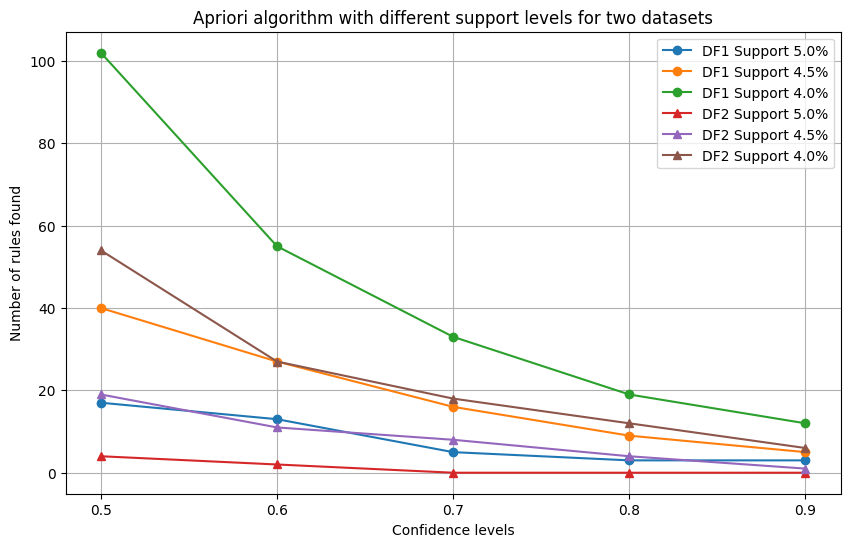

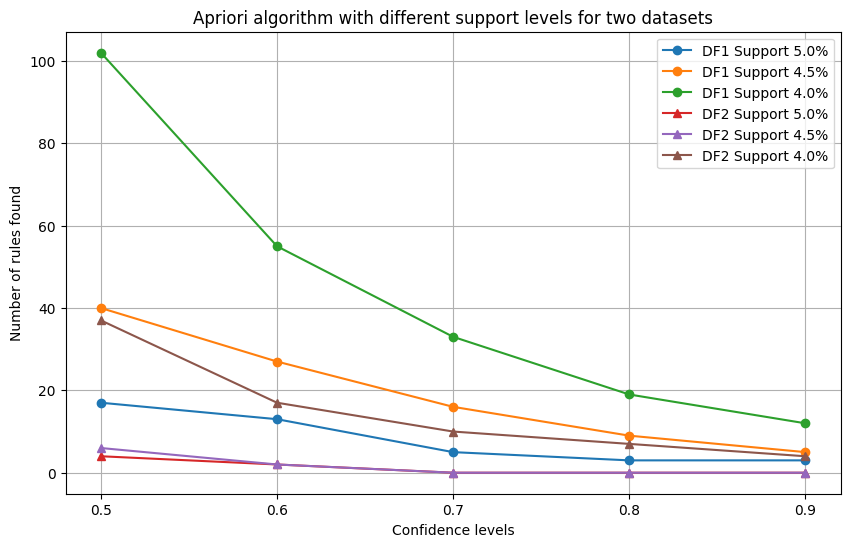

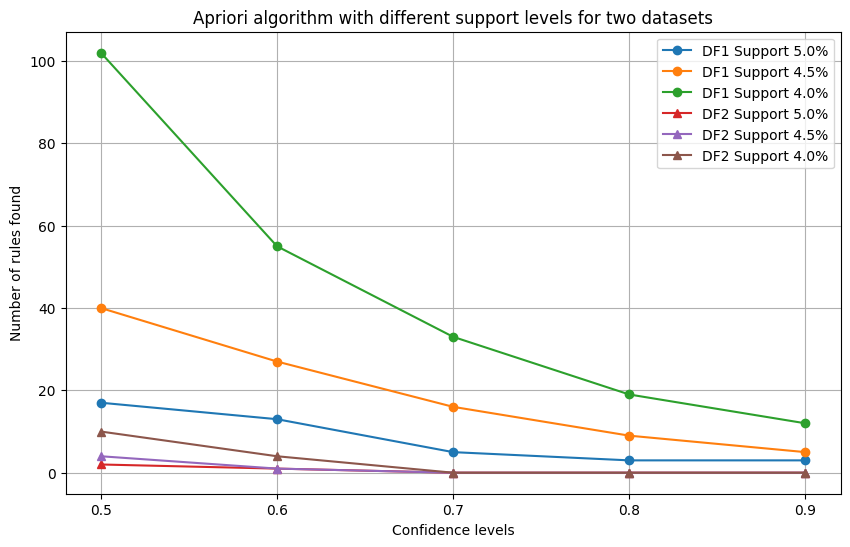

In [220]:
# Plotting the number of rules found for different support levels and confidence levels

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

def plot_mul_graph(df1,df2):
    df_binary_1 = df1
    df_binary_2 = df2

# Assuming df_binary_1 and df_binary_2 are your dataframes with binary encoded data

# Define a range of minimum support values and confidence levels
    min_support_values = [0.05, 0.045, 0.04]
    confidence_levels = np.arange(0.5, 1.0, 0.1)

    # Initialize dictionaries to store the number of rules for each dataframe
    rules_count_1 = {s: [] for s in min_support_values}
    rules_count_2 = {s: [] for s in min_support_values}


    # Function to compute rules
    def compute_rules(df_binary, rules_count):
        for min_support in min_support_values:
            # Apply the Apriori algorithm to find frequent itemsets
            frequent_itemsets = apriori(df_binary, min_support=min_support, use_colnames=True)

            for conf in confidence_levels:
                # Generate association rules
                rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
                # Count the number of rules
                rules_count[min_support].append(len(rules))

    # Compute rules for both dataframes
    compute_rules(df_binary_1, rules_count_1)
    compute_rules(df_binary_2, rules_count_2)

    # Plotting the results on the same graph
    plt.figure(figsize=(10, 6))

    for min_support, counts in rules_count_1.items():
        plt.plot(confidence_levels, counts, marker='o', label=f'DF1 Support {min_support*100}%')

    for min_support, counts in rules_count_2.items():
        plt.plot(confidence_levels, counts, marker='^', label=f'DF2 Support {min_support*100}%')

    plt.title('Apriori algorithm with different support levels for two datasets')
    plt.xlabel('Confidence levels')
    plt.ylabel('Number of rules found')
    plt.xticks(confidence_levels)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_mul_graph(df_binary_transactions_original, df_binary_modified_txn_05)
plot_mul_graph(df_binary_transactions_original, df_binary_modified_txn_045)
plot_mul_graph(df_binary_transactions_original, df_binary_modified_txn_04)
